<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/02_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.20.0


In [3]:
# Creating features
X=tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

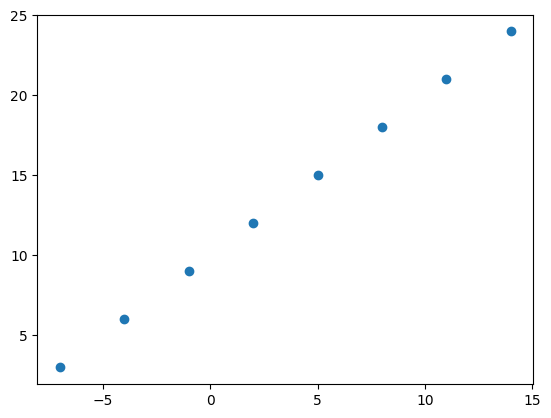

In [5]:
# Visulize it
plt.scatter(X,y)


# **Create a  demo tensor for our housing price prediction problem**

In [6]:
house_info=tf.constant(['bedroom','bathroom','garaage'])
house_price=tf.constant([971325])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garaage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([971325], dtype=int32)>)

In [7]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

(TensorShape([8]), (8,))

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, np.float64(3.0))

# **Neural Net Building**

In [11]:
tf.random.set_seed(42)

# create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - loss: 10.3322 - mae: 10.3322
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 10.1997 - mae: 10.1997
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.0672 - mae: 10.0672
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.9347 - mae: 9.9347
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.8022 - mae: 9.8022


In [12]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[18.411394]], dtype=float32)

# **Improve models perfromance**
HyperParameter Tuning


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=101)

Epoch 1/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step - loss: 12.8503 - mae: 12.8503
Epoch 2/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.2699 - mae: 12.2699
Epoch 3/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 11.6729 - mae: 11.6729
Epoch 4/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 11.0503 - mae: 11.0503
Epoch 5/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 10.3702 - mae: 10.3702
Epoch 6/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.6192 - mae: 9.6192
Epoch 7/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 8.7798 - mae: 8.7798
Epoch 8/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.8117 - mae: 7.8117
Epoch 9/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 6.6985 - mae: 6.6985
Epoch 10/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 5.4330 - mae: 5.4330
Epoch 11/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 4.1110 - mae: 4.1110
Epoch 12/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3.9386 - mae: 3.9386
Epoch 13/101
1/1 ━━━━━━━━━━━━━━━━━

In [14]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[31.724503]], dtype=float32)

In [15]:
# again hyperparamter tuning

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=90)

Epoch 1/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 253.7300 - mse: 253.7300
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 215.8777 - mse: 215.8777
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 196.2500 - mse: 196.2500
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 167.7677 - mse: 167.7677
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 127.7571 - mse: 127.7571
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 79.3318 - mse: 79.3318
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 33.7712 - mse: 33.7712
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 18.8917 - mse: 18.8917
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 56.6314 - mse: 56.6314
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 65.4831 - mse: 65.4831
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 41.0174 - mse: 41.0174
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 18.1405 - mse: 18.1405
Epoch 13/90
1/1 ━━━━━━━━━━━━

In [16]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[27.41245]], dtype=float32)

# **Making Dataset Bigger**

In [17]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

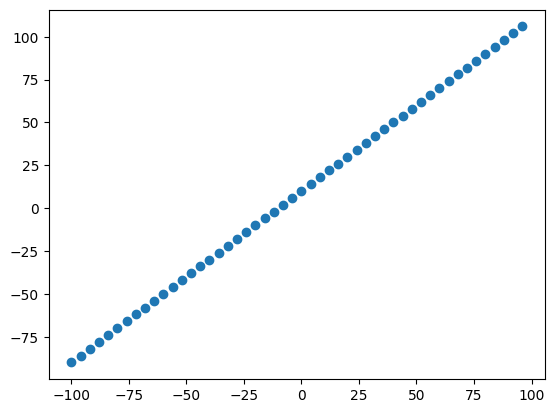

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# **Train Test Split**
* Three Sets
> Training , Validation and Test Set

In [20]:
# Split data into train and test set
len(X)

50

In [21]:
X_train=X[:40]   # 80% for training purpose
y_train=y[:40]

X_test=X[40:]   # 20 % for testing
y_test=y[40:]


# **Visualize the Data**

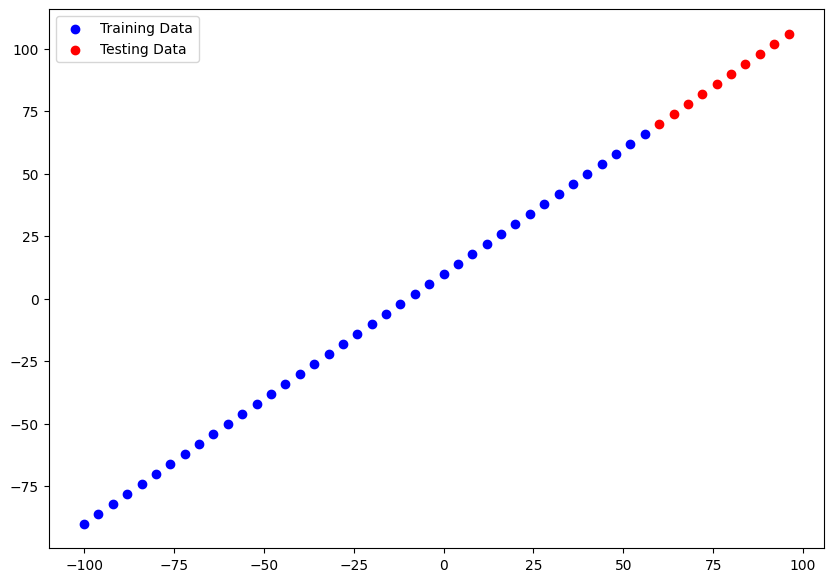

In [22]:
plt.figure(figsize=(10,7))

# plot training data
plt.scatter(X_train,y_train,c='b',label='Training Data')

# plot test data
plt.scatter(X_test,y_test,c='r',label='Testing Data')

plt.legend();

In [23]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 26.0407 - mae: 26.0407 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.2761 - mae: 10.2761
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.9166 - mae: 9.9166  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.3379 - mae: 11.3379
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.8831 - mae: 8.8831
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.9924 - mae: 9.9924  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.4675 - mae: 11.4675
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.9589 - mae: 8.9589
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.0683 - mae: 10.0683
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.6012 - mae: 11.6012
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.6291 - mae: 12.6291
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.3733 - mae: 8.3733
Epoch 13/100
2/2 ━━━━━━━━━━━━━

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
len(X_train)

40

In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(40,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(20,name='hidden_layer1'),
    tf.keras.layers.Dense(10,name='hidden_laye2r'),
    tf.keras.layers.Dense(1,name='Output_Layer')
],name='model_1')

In [28]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

In [29]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [30]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 40)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_laye2r (Dense)           │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[ 69.98259 ],
       [ 73.981964],
       [ 77.98134 ],
       [ 81.98071 ],
       [ 85.9801  ],
       [ 89.97947 ],
       [ 93.97886 ],
       [ 97.97824 ],
       [101.97761 ],
       [105.97699 ]], dtype=float32)

In [33]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_test,y_test,c='b',label='Testing Data')
  plt.scatter(X_train,y_train,c='g',label='Training Data')
  plt.plot(X_test,y_pred,c='r',label='Predictions')
  plt.legend();

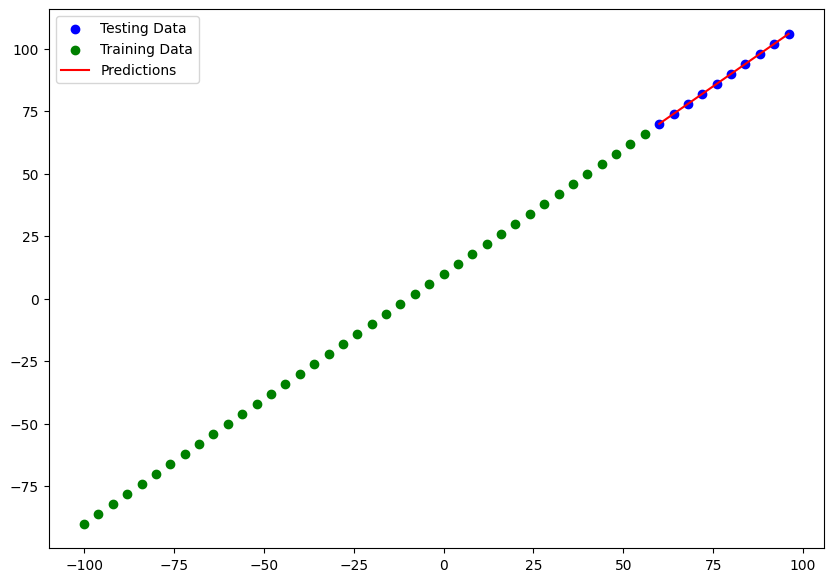

In [34]:
plot_predictions()

# **Evalvating Model**
MAE, MSE , HUBER

In [35]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 4.1174e-04 - mse: 4.1174e-04


[0.00041173590580001473, 0.00041173590580001473]

Mean Absolute Error

In [36]:
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(0.020212555)

Mean Squared Error

In [37]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred)).numpy()

np.float32(0.0004117359)

Some Functions to reuse MAE AND MSE

In [38]:
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true,tf.squeeze(y_pred))
def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true,tf.squeeze(y_pred))

**Running Experiments to improve our model**

* get more data
* make model larger
* train model more longer

**Lets do 3 modelling experiments right now**

* model1: same as orignal 1 layer , 100 epochs
* model2: same as orignal 2 layer , 100 epochs
* model3: same as orignal 2 layer , 500 epochs

In [39]:
# model 1 

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_1.fit(X_train,y_train,epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 34.8182 - mae: 34.8182 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.7340 - mae: 34.7340
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.6499 - mae: 34.6499
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.5657 - mae: 34.5657
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.4816 - mae: 34.4816
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.3975 - mae: 34.3975
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.3133 - mae: 34.3133
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 34.2292 - mae: 34.2292
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.1451 - mae: 34.1451
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 34.0609 - mae: 34.0609
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 33.9768 - mae: 33.9768
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.8926 - mae: 33.8926
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


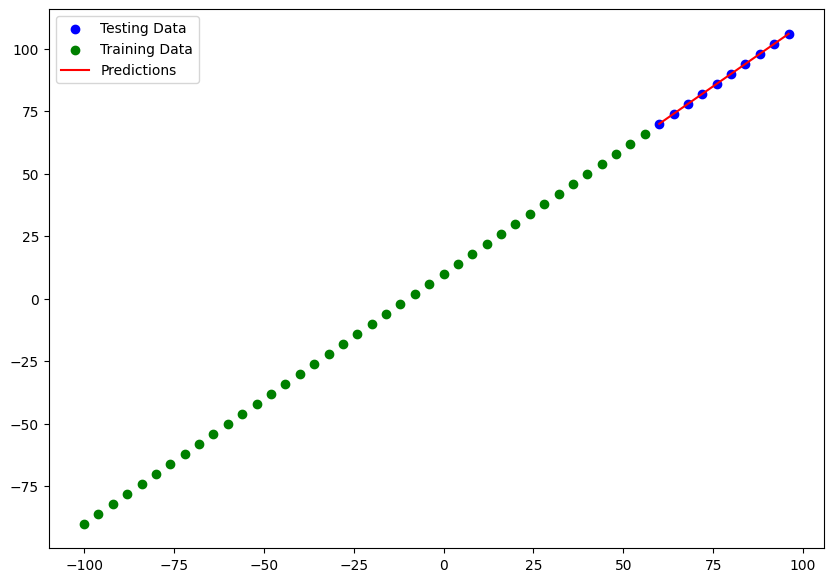

In [40]:
y_pred1=model_1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [41]:
mae_1=mae(y_test,y_pred1)
mse_1=mae(y_test,y_pred1)

In [42]:
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=31.297290802001953>,
 <tf.Tensor: shape=(), dtype=float32, numpy=31.297290802001953>)

In [43]:
# model2 
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_2.fit(X_test,y_test,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 52.5139 - mae: 52.5139
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 52.0113 - mae: 52.0113
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 51.5084 - mae: 51.5084
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 51.0052 - mae: 51.0052
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 50.5017 - mae: 50.5017
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 49.9977 - mae: 49.9977
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 49.4935 - mae: 49.4935
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 48.9889 - mae: 48.9889
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 48.4839 - mae: 48.4839
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 47.9786 - mae: 47.9786
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 47.4729 - mae: 47.4729
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 46.9668 - mae: 46.9668
Epoch 13/100
1/1 ━━━━━━━━━

In [44]:
y_pred_2=model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


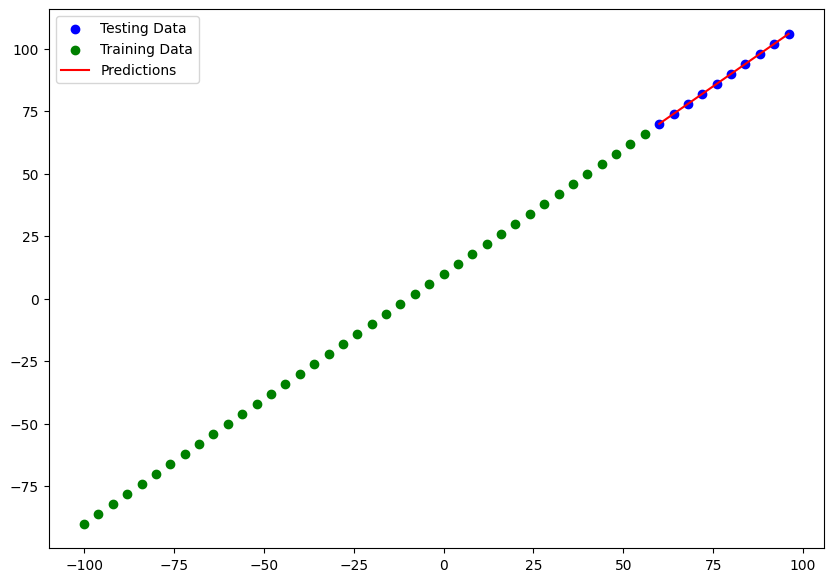

In [45]:
plot_predictions(predictions=y_pred_2)

In [46]:
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2895736694335938>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.252943277359009>)

In [47]:
# Model3  layers 2 epochs 500
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [48]:
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 45.3027 - mae: 45.3027
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 44.5918 - mae: 44.5918 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 43.8833 - mae: 43.8833
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 43.1763 - mae: 43.1763
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 42.4708 - mae: 42.4708
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 41.7669 - mae: 41.7669
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 41.0644 - mae: 41.0644
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 40.3634 - mae: 40.3634
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 39.6641 - mae: 39.6641
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 38.9663 - mae: 38.9663
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.2701 - mae: 38.2701
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 37.5755 - mae: 37.5755
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


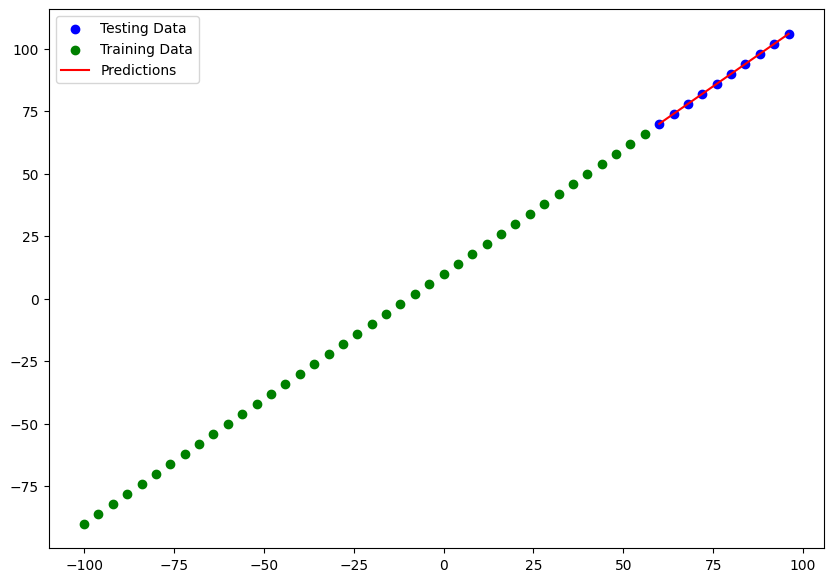

In [49]:
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [50]:
mae_3=mae(y_test,y_pred)
mse_3=mse(y_test,y_pred)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.020212555304169655>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00041173590580001473>)

Comparing the Results of our experiments

In [51]:
import pandas as pd

In [52]:
models_res=[
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(models_res,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,31.297291,31.297291
1,model_2,1.289574,2.252943
2,model_3,0.020213,0.000412


**Model Save**
> Two main Formats : 
* SavedModel Format .export
* HDF5 fromat     .save

In [53]:
model_3.export('best_model_SavedModel_FORMAT')

INFO:tensorflow:Assets written to: best_model_SavedModel_FORMAT\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_FORMAT\assets


Saved artifact at 'best_model_SavedModel_FORMAT'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2368943701072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2368943698576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2368943698768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2368943688208: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [54]:
model_3.save('best_model_HDF5.h5')

Load Model 

In [55]:
# Loading SavedModel Format 

loaded_Saved_Model=tf.keras.models.load_model(r"best_model_HDF5.h5")
loaded_Saved_Model_predict=loaded_Saved_Model.predict(X_test)
model_3_preds=model_3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [58]:
loaded_Saved_Model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [56]:
# comparing predictions of saved and loaded Model
model_3_preds==loaded_Saved_Model_predict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
mae(y_test,model_3_preds)==mae(y_test,loaded_Saved_Model_predict)

<tf.Tensor: shape=(), dtype=bool, numpy=True>